<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio: Construcción Modelo de Clasificación y Evaluación de Métricas

Tras realizar el preprocesamiento de los datos y dejarlos listos para construir modelos, ha llegado el momento de dar el siguiente paso: desarrollar tu **primer modelo de clasificación**.

El objetivo de este laboratorio es implementar un modelo de clasificación inicial utilizando **Regresión Logística (Logistic Regression)**. Este modelo te permitirá obtener las primeras predicciones para identificar transacciones normales y anómalas, así como evaluar su desempeño utilizando métricas estándar.

Además, deberás evaluar si el modelo está en riesgo de **overfitting**, asegurando que nuestras predicciones sean consistentes tanto en los datos de entrenamiento como en los de prueba.


## Objetivo del Laboratorio

1. Entrenar un modelo de **Regresión Logística** para predecir si una transacción es "Normal" o "Anómala".

2. Evaluar el desempeño del modelo utilizando métricas como:

   - Precisión (Accuracy).

   - Matriz de confusión.

   - Precisión (Precision), exhaustividad (Recall) y F1-Score.

   - Área bajo la curva ROC (AUC-ROC).

3. Determinar si el modelo presenta **overfitting** o **underfitting**, analizando el rendimiento en los datos de entrenamiento y prueba.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../")
from src import soporte_ajuste_logistica as sal

In [2]:
df = pd.read_pickle('../datos/df_estandarizado.pkl')

In [3]:
df.head()

,customer_id,merchant_id,is_fraudulent,location,purchase_category,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,amount_minmax,customer_age_minmax
0,0.5405405405405406,0.5178571428571429,0,0.4973821989528796,0.524609843937575,0.0,0.0,1.0,0.0,0.575423,0.480769
1,0.5436893203883495,0.5368421052631579,1,0.529126213592233,0.48697758933979407,0.0,0.0,0.0,1.0,0.189301,0.826923
2,0.5862068965517241,0.5060240963855421,1,0.6,0.524609843937575,0.0,0.0,1.0,0.0,0.123960,0.750000
3,0.5436893203883495,0.5257731958762887,1,0.6,0.5053128689492326,0.0,1.0,0.0,0.0,0.761671,0.788462
4,0.47,0.5238095238095238,1,0.4973821989528796,0.5135460565924143,0.0,0.0,1.0,0.0,0.188153,0.346154


In [4]:
df = df.astype(float)

In [5]:
analisis_mod_clas = sal.AnalisisModelosClasificacion(df, "is_fraudulent")

In [6]:
analisis_mod_clas.ajustar_modelo("logistic_regression")

In [7]:
analisis_mod_clas.calcular_metricas("logistic_regression")

,train,test
accuracy,0.560527,0.568170
precision,0.560339,0.567925
recall,0.560527,0.568170
f1,0.559993,0.567837
kappa,0.120091,0.135275
auc,0.584074,0.599356


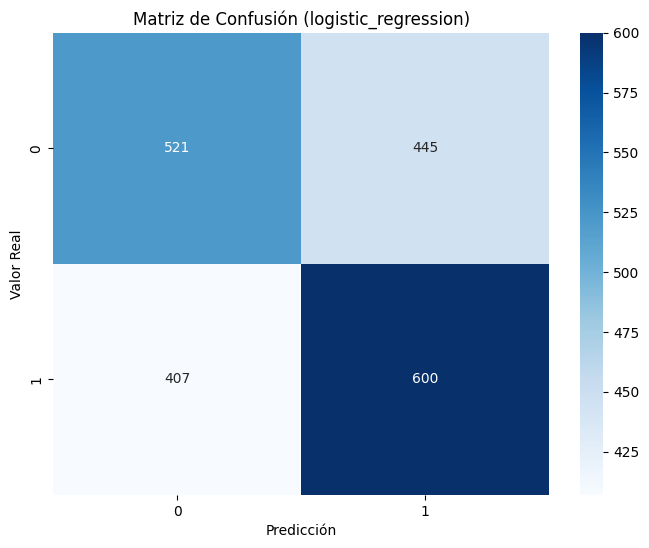

In [8]:
analisis_mod_clas.plot_matriz_confusion("logistic_regression")

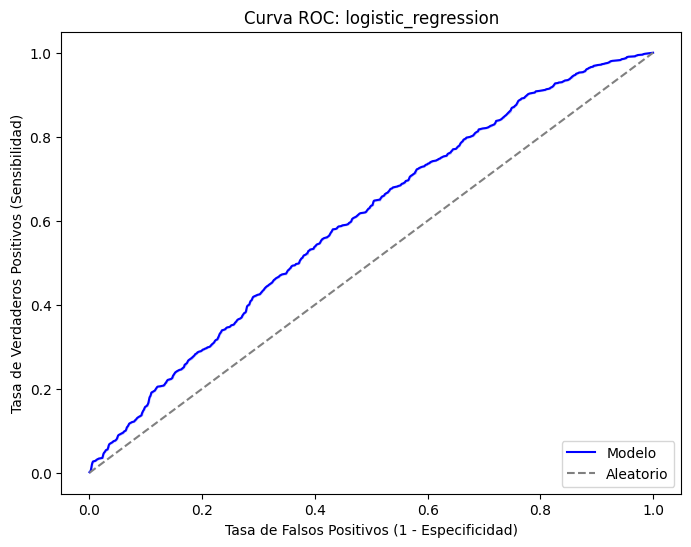

In [9]:
analisis_mod_clas.curva_roc("logistic_regression")